In [144]:
# Plot of the mean daily cycle of a specified month
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

plt.style.use('seaborn-poster')


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)        
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000},index=obs_num)
#Select the timeframe to make the plots
#df = df[(df.G_date>'2014-07-01') & (df.G_date<'2014-08-01')]
jan1=df[(df.G_date=='2014-01-01')]

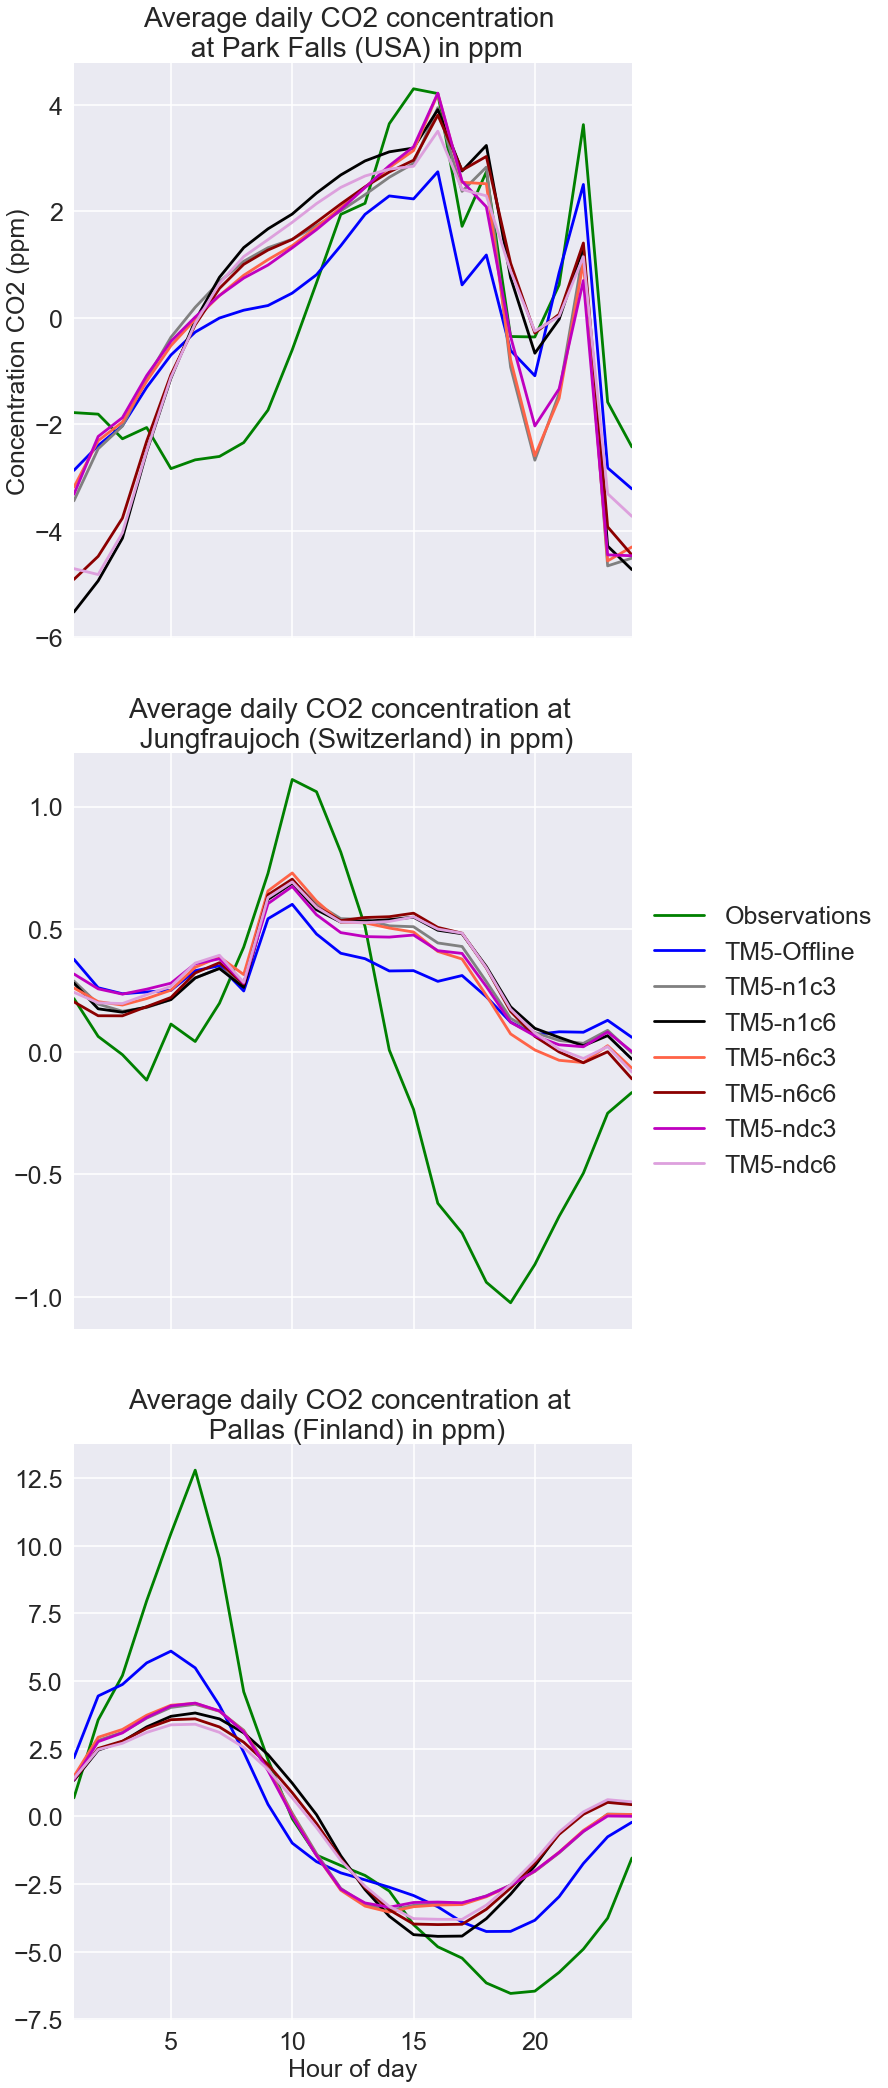

In [152]:
plt.style.use('seaborn-poster')
#print(df)
df = df[(df.G_date>'2014-07-01') & (df.G_date<'2014-08-01')]
mask_loc = 'lef'
mask = (df.I_obs_loc==mask_loc)
mask_jan1=(jan1.I_obs_loc==mask_loc)
#print(df[mask])
#print(df[mask][df[mask].index.duplicated()])
df_amt=df[mask].drop_duplicates()
df_amt['A_fin_obs']=df_amt['A_fin_obs']-df_amt['A_fin_obs'].drop_duplicates().mean()
df_amt['B_fmp_obs']=df_amt['B_fmp_obs']-df_amt['B_fmp_obs'].drop_duplicates().mean()
df_amt['C_fn1c3_obs']=df_amt['C_fn1c3_obs']-df_amt['C_fn1c3_obs'].drop_duplicates().mean()
df_amt['U_fn1c6_obs']=df_amt['U_fn1c6_obs']-df_amt['U_fn1c6_obs'].drop_duplicates().mean()
df_amt['V_fn6c6_obs']=df_amt['V_fn6c6_obs']-df_amt['V_fn6c6_obs'].drop_duplicates().mean()
df_amt['W_fndc6_obs']=df_amt['W_fndc6_obs']-df_amt['W_fndc6_obs'].drop_duplicates().mean()
df_amt['X_fn6c3_obs']=df_amt['X_fn6c3_obs']-df_amt['X_fn6c3_obs'].drop_duplicates().mean()
df_amt['Y_fndc3_obs']=df_amt['Y_fndc3_obs']-df_amt['Y_fndc3_obs'].drop_duplicates().mean()

amt_fin_obs=df_amt.groupby([df_amt['G_date'].dt.hour])['A_fin_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_mp=df_amt.groupby([df_amt['G_date'].dt.hour])['B_fmp_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_n1c3=df_amt.groupby([df_amt['G_date'].dt.hour])['C_fn1c3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_n1c6=df_amt.groupby([df_amt['G_date'].dt.hour])['U_fn1c6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_n6c6=df_amt.groupby([df_amt['G_date'].dt.hour])['V_fn6c6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_ndc6=df_amt.groupby([df_amt['G_date'].dt.hour])['W_fndc6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_n6c3=df_amt.groupby([df_amt['G_date'].dt.hour])['X_fn6c3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
amt_fin_ndc3=df_amt.groupby([df_amt['G_date'].dt.hour])['Y_fndc3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,36))
size = 2
alpha=.3
hours = 1+np.arange(24)
#print(np.shape(hours),np.shape(amt_fin_obs['mean']))
#print(amt_fin_obs['mean'],hours)
ax1.set_title("Average daily CO2 concentration \n at Park Falls (USA) in ppm",fontsize=28)
ax1.plot(hours,amt_fin_obs['mean'], color = 'g', ms=size,label='Observations')
ax1.plot(hours,amt_fin_mp['mean'], color = 'b', ms=size,label='Observations')
ax1.plot(hours,amt_fin_n1c3['mean'], color = '0.5', ms=size,label='Observations')
ax1.plot(hours,amt_fin_n1c6['mean'], color = '0', ms=size,label='Observations')
ax1.plot(hours,amt_fin_n6c3['mean'], color = 'tomato', ms=size,label='Observations')
ax1.plot(hours,amt_fin_n6c6['mean'], color = 'darkred', ms=size,label='Observations')
ax1.plot(hours,amt_fin_ndc3['mean'], color = 'm', ms=size,label='Observations')
ax1.plot(hours,amt_fin_ndc6['mean'], color = 'plum', ms=size,label='Observations')
ax1.set_xlim([1,24])

mask_loc = 'jfj'
mask = (df.I_obs_loc==mask_loc)
mask_jan1=(jan1.I_obs_loc==mask_loc)
df_jfj=df[mask].drop_duplicates()
df_jfj['A_fin_obs']=df_jfj['A_fin_obs']-df_jfj['A_fin_obs'].drop_duplicates().mean()
df_jfj['B_fmp_obs']=df_jfj['B_fmp_obs']-df_jfj['B_fmp_obs'].drop_duplicates().mean()
df_jfj['C_fn1c3_obs']=df_jfj['C_fn1c3_obs']-df_jfj['C_fn1c3_obs'].drop_duplicates().mean()
df_jfj['U_fn1c6_obs']=df_jfj['U_fn1c6_obs']-df_jfj['U_fn1c6_obs'].drop_duplicates().mean()
df_jfj['V_fn6c6_obs']=df_jfj['V_fn6c6_obs']-df_jfj['V_fn6c6_obs'].drop_duplicates().mean()
df_jfj['W_fndc6_obs']=df_jfj['W_fndc6_obs']-df_jfj['W_fndc6_obs'].drop_duplicates().mean()
df_jfj['X_fn6c3_obs']=df_jfj['X_fn6c3_obs']-df_jfj['X_fn6c3_obs'].drop_duplicates().mean()
df_jfj['Y_fndc3_obs']=df_jfj['Y_fndc3_obs']-df_jfj['Y_fndc3_obs'].drop_duplicates().mean()

jfj_fin_obs=df_jfj.groupby([df_jfj['G_date'].dt.hour])['A_fin_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_mp=df_jfj.groupby([df_jfj['G_date'].dt.hour])['B_fmp_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_n1c3=df_jfj.groupby([df_jfj['G_date'].dt.hour])['C_fn1c3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_n1c6=df_jfj.groupby([df_jfj['G_date'].dt.hour])['U_fn1c6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_n6c6=df_jfj.groupby([df_jfj['G_date'].dt.hour])['V_fn6c6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_ndc6=df_jfj.groupby([df_jfj['G_date'].dt.hour])['W_fndc6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_n6c3=df_jfj.groupby([df_jfj['G_date'].dt.hour])['X_fn6c3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
jfj_fin_ndc3=df_jfj.groupby([df_jfj['G_date'].dt.hour])['Y_fndc3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})

ax2.set_title("Average daily CO2 concentration at \n Jungfraujoch (Switzerland) in ppm)",fontsize=28)
ax2.plot(hours,jfj_fin_obs['mean'], color = 'g', ms=size,label='Observations')
ax2.plot(hours,jfj_fin_mp['mean'], color = 'b', ms=size,label='TM5-Offline')
ax2.plot(hours,jfj_fin_n1c3['mean'], color = '0.5', ms=size,label='TM5-n1c3')
ax2.plot(hours,jfj_fin_n1c6['mean'], color = '0', ms=size,label='TM5-n1c6')
ax2.plot(hours,jfj_fin_n6c3['mean'], color = 'tomato', ms=size,label='TM5-n6c3')
ax2.plot(hours,jfj_fin_n6c6['mean'], color = 'darkred', ms=size,label='TM5-n6c6')
ax2.plot(hours,jfj_fin_ndc3['mean'], color = 'm', ms=size,label='TM5-ndc3')
ax2.plot(hours,jfj_fin_ndc6['mean'], color = 'plum', ms=size,label='TM5-ndc6')

mask_loc = 'lut'
mask = (df.I_obs_loc==mask_loc)
mask_jan1=(jan1.I_obs_loc==mask_loc)
df_pal=df[mask].drop_duplicates()
df_pal['A_fin_obs']=df_pal['A_fin_obs']-df_pal['A_fin_obs'].drop_duplicates().mean()
df_pal['B_fmp_obs']=df_pal['B_fmp_obs']-df_pal['B_fmp_obs'].drop_duplicates().mean()
df_pal['C_fn1c3_obs']=df_pal['C_fn1c3_obs']-df_pal['C_fn1c3_obs'].drop_duplicates().mean()
df_pal['U_fn1c6_obs']=df_pal['U_fn1c6_obs']-df_pal['U_fn1c6_obs'].drop_duplicates().mean()
df_pal['V_fn6c6_obs']=df_pal['V_fn6c6_obs']-df_pal['V_fn6c6_obs'].drop_duplicates().mean()
df_pal['W_fndc6_obs']=df_pal['W_fndc6_obs']-df_pal['W_fndc6_obs'].drop_duplicates().mean()
df_pal['X_fn6c3_obs']=df_pal['X_fn6c3_obs']-df_pal['X_fn6c3_obs'].drop_duplicates().mean()
df_pal['Y_fndc3_obs']=df_pal['Y_fndc3_obs']-df_pal['Y_fndc3_obs'].drop_duplicates().mean()

pal_fin_obs=df_pal.groupby([df_pal['G_date'].dt.hour])['A_fin_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_mp=df_pal.groupby([df_pal['G_date'].dt.hour])['B_fmp_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_n1c3=df_pal.groupby([df_pal['G_date'].dt.hour])['C_fn1c3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_n1c6=df_pal.groupby([df_pal['G_date'].dt.hour])['U_fn1c6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_n6c6=df_pal.groupby([df_pal['G_date'].dt.hour])['V_fn6c6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_ndc6=df_pal.groupby([df_pal['G_date'].dt.hour])['W_fndc6_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_n6c3=df_pal.groupby([df_pal['G_date'].dt.hour])['X_fn6c3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})
pal_fin_ndc3=df_pal.groupby([df_pal['G_date'].dt.hour])['Y_fndc3_obs'].agg({'mean':np.mean,'count':"count",'sum':"sum"})

#print(np.shape(hours),np.shape(pal_fin_obs['mean']))
#print(pal_fin_obs['mean'],hours)
ax3.set_title("Average daily CO2 concentration at \n Pallas (Finland) in ppm)",fontsize=28)
ax3.plot(hours,pal_fin_obs['mean'], color = 'g', ms=size,label='Observations')
ax3.plot(hours,pal_fin_mp['mean'], color = 'b', ms=size,label='TM5-Offline')
ax3.plot(hours,pal_fin_n1c3['mean'], color = '0.5', ms=size,label='TM5-n1c3')
ax3.plot(hours,pal_fin_n1c6['mean'], color = '0', ms=size,label='TM5-n1c6')
ax3.plot(hours,pal_fin_n6c3['mean'], color = 'tomato', ms=size,label='TM5-n6c3')
ax3.plot(hours,pal_fin_n6c6['mean'], color = 'darkred', ms=size,label='TM5-n6c6')
ax3.plot(hours,pal_fin_ndc3['mean'], color = 'm', ms=size,label='TM5-ndc3')
ax3.plot(hours,pal_fin_ndc6['mean'], color = 'plum', ms=size,label='TM5-ndc6')
ax1.set_ylabel('Concentration CO2 (ppm)', fontsize=25)
ax3.set_xlabel('Hour of day', fontsize=25)
lgd=ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 10,fontsize='25')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + 
            ax2.get_xticklabels() + ax2.get_yticklabels() +
            ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(25)
#plt.savefig('BBOS - Daily mean AMT-JFJ-PAL.png',dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()